In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/tickets.csv')

## Exploração Visual

In [4]:
print(df.head())
print(df.describe(include='all'))

   id urgencia    cliente tipo_servico           origem  tempo_espera  \
0   1    Média  Cliente G     Telefone         Telefone            36   
1   2  Crítica  Cliente D     Internet  Autoatendimento           182   
2   3     Alta  Cliente B     Internet         Telefone            31   
3   4    Média  Cliente E     Internet  Autoatendimento           104   
4   5    Baixa  Cliente K     Internet         WhatsApp           113   

                descricao        status  
0          Queda de sinal  Em andamento  
1        Erro de cobrança        Aberto  
2     Mudança de endereço     Resolvido  
3  Reclamação atendimento  Em andamento  
4  Reclamação atendimento        Aberto  
                 id urgencia    cliente tipo_servico    origem  tempo_espera  \
count   10000.00000    10000      10000        10000     10000   10000.00000   
unique          NaN        4         12            5         5           NaN   
top             NaN    Média  Cliente B     Internet  Telefone       

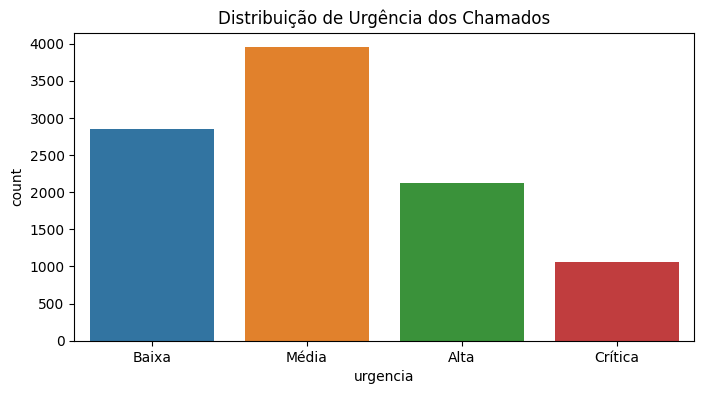

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='urgencia', order=['Baixa', 'Média', 'Alta', 'Crítica'])
plt.title("Distribuição de Urgência dos Chamados")
plt.show()

c:\Users\luizz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


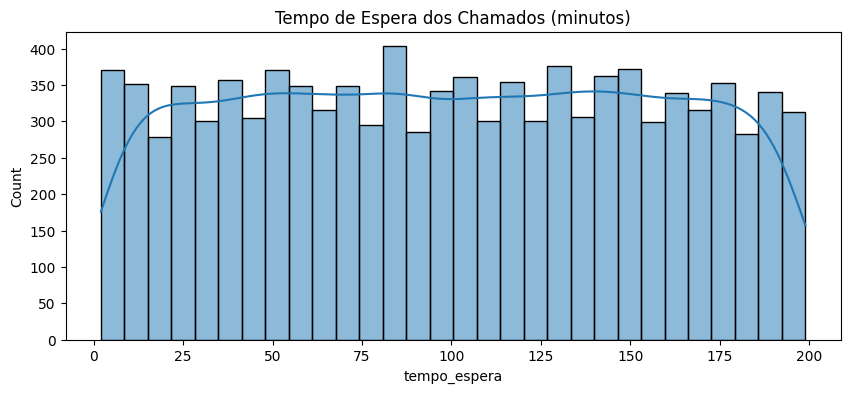

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(df['tempo_espera'], bins=30, kde=True)
plt.title("Tempo de Espera dos Chamados (minutos)")
plt.show()

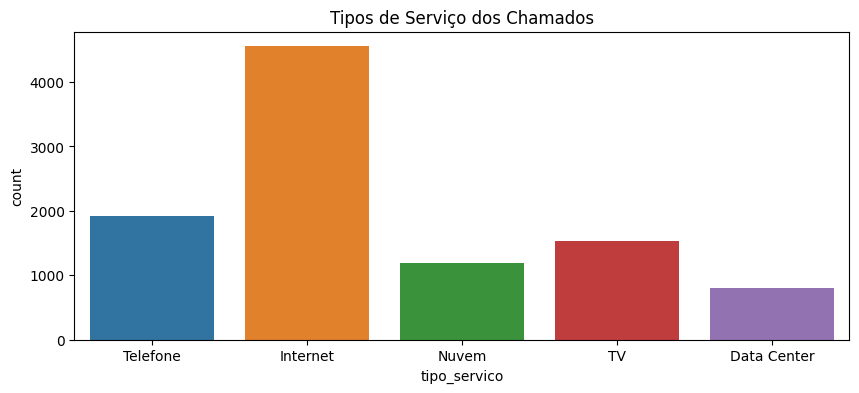

In [7]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='tipo_servico')
plt.title("Tipos de Serviço dos Chamados")
plt.show()

## Criação de Feature de Priorização

In [10]:
# Pesos realistas para urgência e origem do chamado
pesos_urg = {'Baixa': 1, 'Média': 2, 'Alta': 4, 'Crítica': 8}
pesos_origem = {'Autoatendimento': 1, 'Telefone': 2, 'WhatsApp': 2.5, 'Email': 1.5, 'App': 2}

df['peso_urgencia'] = df['urgencia'].map(pesos_urg)
df['peso_origem'] = df['origem'].map(pesos_origem)
df['tempo_espera_norm'] = (df['tempo_espera'] - df['tempo_espera'].min()) / (df['tempo_espera'].max() - df['tempo_espera'].min())

In [11]:
# Score final (pode ajustar os pesos para seu cenário)
df['score_priorizacao'] = (
    df['peso_urgencia']*4 +
    df['peso_origem']*1.5 +
    df['tempo_espera_norm']*3 +
    (df['status'] == 'Aberto')*2
)

df.sort_values('score_priorizacao', ascending=False).head(10)

,id,urgencia,cliente,tipo_servico,origem,tempo_espera,descricao,status,peso_urgencia,peso_origem,tempo_espera_norm,score_priorizacao
5312,5313,Crítica,Cliente L,TV,WhatsApp,196,Problema recorrente,Aberto,8,2.5,0.984772,40.704315
140,141,Crítica,Cliente J,Internet,WhatsApp,196,Lentidão,Aberto,8,2.5,0.984772,40.704315
4840,4841,Crítica,Cliente E,Nuvem,WhatsApp,194,Instabilidade,Aberto,8,2.5,0.974619,40.673858
3952,3953,Crítica,Cliente B,Internet,WhatsApp,191,Erro de cobrança,Aberto,8,2.5,0.959391,40.628173
1238,1239,Crítica,Cliente D,Telefone,WhatsApp,188,Solicitação de upgrade,Aberto,8,2.5,0.944162,40.582487
4990,4991,Crítica,Cliente C,Internet,WhatsApp,182,Mudança de endereço,Aberto,8,2.5,0.913706,40.491117
9690,9691,Crítica,Cliente K,TV,WhatsApp,179,Queda de sinal,Aberto,8,2.5,0.898477,40.445431
6990,6991,Crítica,Cliente H,Telefone,WhatsApp,178,Falha total,Aberto,8,2.5,0.893401,40.430203
6117,6118,Crítica,Cliente E,Telefone,WhatsApp,173,Queda de sinal,Aberto,8,2.5,0.868020,40.354061
8495,8496,Crítica,Cliente B,Data Center,WhatsApp,169,Erro de cobrança,Aberto,8,2.5,0.847716,40.293147


In [13]:
df.to_csv('../data/tickets_featured.csv', index=False)